In [1]:
# Installing latest Albumentation library
!pip install -U git+https://github.com/albu/albumentations -q --quiet

# For inline matplotlib plotting
%matplotlib inline

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 77.6 MB/s eta 0:00:00


In [2]:
from data_loader import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=128)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

CUDA availability ? True


100%|██████████| 170498071/170498071 [00:03<00:00, 42789422.09it/s]


Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


In [3]:
cifar10.data_summary_stats()

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


Files already downloaded and verified


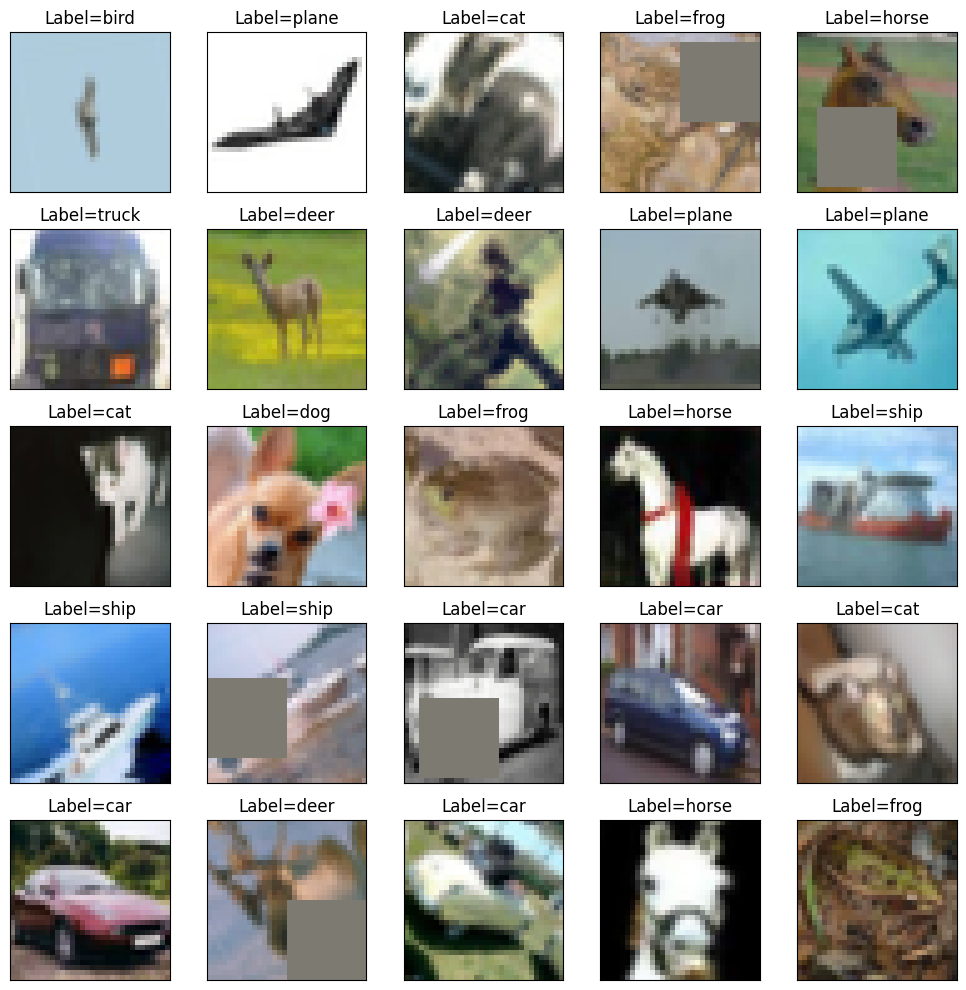

In [4]:
cifar10.sample_pictures(train_flag=True)

In [5]:
from model import *

# Loading Custom Model
net = Net()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


In [6]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4          [-1, 192, 32, 32]           6,144
              ReLU-5          [-1, 192, 32, 32]               0
       BatchNorm2d-6          [-1, 192, 32, 32]             384
            Conv2d-7          [-1, 192, 32, 32]           1,728
              ReLU-8          [-1, 192, 32, 32]               0
       BatchNorm2d-9          [-1, 192, 32, 32]             384
           Conv2d-10           [-1, 32, 32, 32]           6,144
             ReLU-11           [-1, 32, 32, 32]               0
      BatchNorm2d-12           [-1, 32, 32, 32]              64
           Conv2d-13           [-1, 32, 16, 16]           9,216
      BatchNorm2d-14           [-1, 32,

In [7]:
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.25, momentum=0.85)
scheduler = StepLR(optimizer, step_size=6, gamma=0.2)

In [8]:
# Load train and test model
from main import *

train = train()
test = test()

EPOCHS= 30

for epoch in range(EPOCHS):  # loop over the dataset multiple times

    train.execute(net, device, trainloader, optimizer, criterion, epoch)
    scheduler.step()
    test.execute(net, device, testloader, criterion)

print('Finished Training')

Epoch: 0,Loss=1.36 Batch_id=390 Accuracy=43.77: 100%|██████████| 391/391 [00:22<00:00, 17.39it/s]


Test set: Average loss: 0.0103, Accuracy: 5502/10000 (55.02%)



Epoch: 1,Loss=1.01 Batch_id=390 Accuracy=56.76: 100%|██████████| 391/391 [00:18<00:00, 20.71it/s]


Test set: Average loss: 0.0074, Accuracy: 6703/10000 (67.03%)



Epoch: 2,Loss=1.15 Batch_id=390 Accuracy=62.66: 100%|██████████| 391/391 [00:18<00:00, 21.39it/s]


Test set: Average loss: 0.0068, Accuracy: 6987/10000 (69.87%)



Epoch: 3,Loss=0.79 Batch_id=390 Accuracy=66.21: 100%|██████████| 391/391 [00:19<00:00, 20.03it/s]


Test set: Average loss: 0.0062, Accuracy: 7274/10000 (72.74%)



Epoch: 4,Loss=0.80 Batch_id=390 Accuracy=68.51: 100%|██████████| 391/391 [00:18<00:00, 21.38it/s]


Test set: Average loss: 0.0055, Accuracy: 7595/10000 (75.95%)



Epoch: 5,Loss=1.09 Batch_id=390 Accuracy=70.12: 100%|██████████| 391/391 [00:18<00:00, 21.60it/s]


Test set: Average loss: 0.0053, Accuracy: 7682/10000 (76.82%)



Epoch: 6,Loss=0.77 Batch_id=390 Accuracy=75.17: 100%|██████████| 391/391 [00:19<00:00, 19.78it/s]


Test set: Average loss: 0.0043, Accuracy: 8107/10000 (81.07%)



Epoch: 7,Loss=0.74 Batch_id=390 Accuracy=76.07: 100%|██████████| 391/391 [00:19<00:00, 20.35it/s]


Test set: Average loss: 0.0041, Accuracy: 8183/10000 (81.83%)



Epoch: 8,Loss=0.62 Batch_id=390 Accuracy=76.95: 100%|██████████| 391/391 [00:18<00:00, 20.86it/s]


Test set: Average loss: 0.0040, Accuracy: 8232/10000 (82.32%)



Epoch: 9,Loss=0.57 Batch_id=390 Accuracy=77.55: 100%|██████████| 391/391 [00:19<00:00, 20.21it/s]


Test set: Average loss: 0.0040, Accuracy: 8224/10000 (82.24%)



Epoch: 10,Loss=0.81 Batch_id=390 Accuracy=78.00: 100%|██████████| 391/391 [00:18<00:00, 21.23it/s]


Test set: Average loss: 0.0039, Accuracy: 8290/10000 (82.90%)



Epoch: 11,Loss=0.65 Batch_id=390 Accuracy=78.32: 100%|██████████| 391/391 [00:18<00:00, 21.46it/s]


Test set: Average loss: 0.0039, Accuracy: 8318/10000 (83.18%)



Epoch: 12,Loss=0.66 Batch_id=390 Accuracy=79.53: 100%|██████████| 391/391 [00:19<00:00, 20.55it/s]


Test set: Average loss: 0.0037, Accuracy: 8379/10000 (83.79%)



Epoch: 13,Loss=0.57 Batch_id=390 Accuracy=79.69: 100%|██████████| 391/391 [00:19<00:00, 20.48it/s]


Test set: Average loss: 0.0036, Accuracy: 8407/10000 (84.07%)



Epoch: 14,Loss=0.65 Batch_id=390 Accuracy=80.15: 100%|██████████| 391/391 [00:18<00:00, 21.48it/s]


Test set: Average loss: 0.0036, Accuracy: 8411/10000 (84.11%)



Epoch: 15,Loss=0.55 Batch_id=390 Accuracy=79.88: 100%|██████████| 391/391 [00:19<00:00, 20.31it/s]


Test set: Average loss: 0.0036, Accuracy: 8418/10000 (84.18%)



Epoch: 16,Loss=0.53 Batch_id=390 Accuracy=80.23: 100%|██████████| 391/391 [00:18<00:00, 21.17it/s]


Test set: Average loss: 0.0036, Accuracy: 8430/10000 (84.30%)



Epoch: 17,Loss=0.64 Batch_id=390 Accuracy=80.00: 100%|██████████| 391/391 [00:19<00:00, 20.49it/s]


Test set: Average loss: 0.0036, Accuracy: 8453/10000 (84.53%)



Epoch: 18,Loss=0.62 Batch_id=390 Accuracy=80.23: 100%|██████████| 391/391 [00:18<00:00, 21.04it/s]


Test set: Average loss: 0.0036, Accuracy: 8461/10000 (84.61%)



Epoch: 19,Loss=0.53 Batch_id=390 Accuracy=80.69: 100%|██████████| 391/391 [00:18<00:00, 21.36it/s]


Test set: Average loss: 0.0035, Accuracy: 8455/10000 (84.55%)



Epoch: 20,Loss=0.58 Batch_id=390 Accuracy=80.60: 100%|██████████| 391/391 [00:19<00:00, 20.36it/s]


Test set: Average loss: 0.0036, Accuracy: 8456/10000 (84.56%)



Epoch: 21,Loss=0.43 Batch_id=390 Accuracy=80.75: 100%|██████████| 391/391 [00:19<00:00, 20.30it/s]


Test set: Average loss: 0.0035, Accuracy: 8462/10000 (84.62%)



Epoch: 22,Loss=0.65 Batch_id=390 Accuracy=80.76: 100%|██████████| 391/391 [00:18<00:00, 21.38it/s]


Test set: Average loss: 0.0036, Accuracy: 8452/10000 (84.52%)



Epoch: 23,Loss=0.53 Batch_id=390 Accuracy=80.69: 100%|██████████| 391/391 [00:19<00:00, 20.56it/s]


Test set: Average loss: 0.0036, Accuracy: 8452/10000 (84.52%)



Epoch: 24,Loss=0.61 Batch_id=390 Accuracy=80.47: 100%|██████████| 391/391 [00:18<00:00, 21.70it/s]


Test set: Average loss: 0.0036, Accuracy: 8441/10000 (84.41%)



Epoch: 25,Loss=0.40 Batch_id=390 Accuracy=80.72: 100%|██████████| 391/391 [00:18<00:00, 20.96it/s]


Test set: Average loss: 0.0035, Accuracy: 8447/10000 (84.47%)



Epoch: 26,Loss=0.55 Batch_id=390 Accuracy=80.80: 100%|██████████| 391/391 [00:18<00:00, 21.34it/s]


Test set: Average loss: 0.0035, Accuracy: 8462/10000 (84.62%)



Epoch: 27,Loss=0.70 Batch_id=390 Accuracy=80.82: 100%|██████████| 391/391 [00:18<00:00, 21.46it/s]


Test set: Average loss: 0.0035, Accuracy: 8453/10000 (84.53%)



Epoch: 28,Loss=0.48 Batch_id=390 Accuracy=80.66: 100%|██████████| 391/391 [00:19<00:00, 20.36it/s]


Test set: Average loss: 0.0036, Accuracy: 8477/10000 (84.77%)



Epoch: 29,Loss=0.59 Batch_id=390 Accuracy=80.81: 100%|██████████| 391/391 [00:18<00:00, 21.60it/s]


Test set: Average loss: 0.0035, Accuracy: 8450/10000 (84.50%)

Finished Training


Files already downloaded and verified


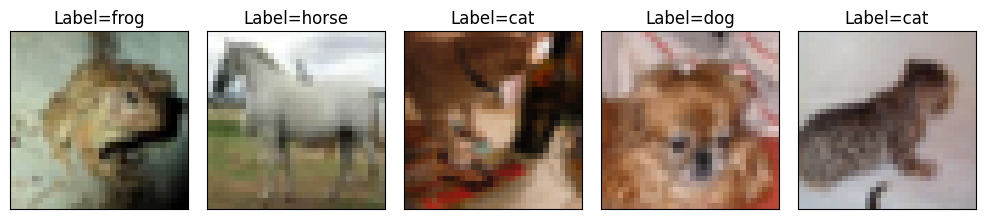

In [9]:
images, labels = cifar10.sample_pictures(train_flag=False, return_flag = True)

In [10]:
images,labels = images.to(device),labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

Predicted:   frog horse   cat   dog   cat


In [11]:
from evaluate import *
calAccuracy(net, trainloader, device)

Accuracy of the network on the  train images: 81.496 %%


In [12]:
calAccuracy(net, testloader, device)

Accuracy of the network on the  train images: 84.5 %%


In [13]:
calClassAccuracy(net, testloader,classes, device)

Accuracy of plane : 84 %
Accuracy of   car : 96 %
Accuracy of  bird : 70 %
Accuracy of   cat : 62 %
Accuracy of  deer : 82 %
Accuracy of   dog : 80 %
Accuracy of  frog : 92 %
Accuracy of horse : 92 %
Accuracy of  ship : 84 %
Accuracy of truck : 97 %


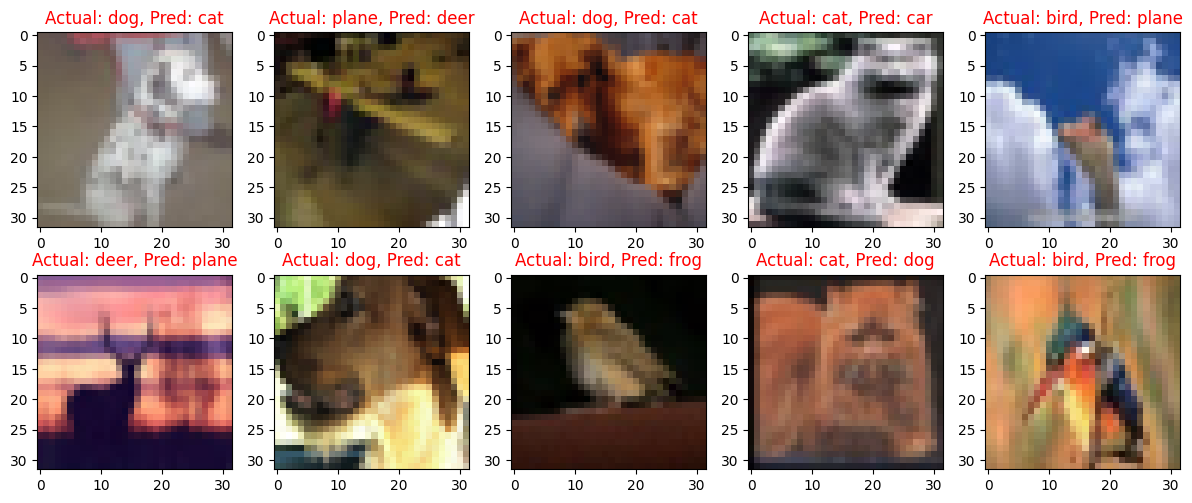

In [14]:
from utils import plot_misclassified_images
plot_misclassified_images(net, testloader, classes, device)